In [54]:
from keras.models import load_model
import tensorflow as tf
import keras_contrib
import keras
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from sklearn.utils import resample
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.utils import img_to_array
from keras.utils import load_img
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [55]:
custom_objects = {'InstanceNormalization': keras_contrib.layers.normalization.instancenormalization.InstanceNormalization}
photo_to_monet = load_model('g_model_BtoA_00005360.h5', custom_objects)
monet_to_photo = load_model('g_model_AtoB_00005360.h5', custom_objects)

In [56]:
opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
photo_to_monet.compile(loss=['mse', 'mae', 'mae', 'mae'], 
               loss_weights=[1, 5, 10, 10], optimizer=opt)
monet_to_photo.compile(loss=['mse', 'mae', 'mae', 'mae'], 
               loss_weights=[1, 5, 10, 10], optimizer=opt)

In [57]:
from matplotlib import pyplot
from numpy.random import randint

# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

# plot the image, its translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()


In [58]:
def load_images(path, size=(256,256)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)

In [59]:
path = 'data/'

In [60]:
allAdata = load_images(path + 'testA/')
allBdata = load_images(path + 'testB/')

In [61]:
A_data = resample(allAdata, 
                 replace=False,     
                 n_samples=50,    
                 random_state=42) # reproducible results

B_data = resample(allBdata, 
                 replace=False,     
                 n_samples=50,    
                 random_state=42) # reproducible results

A_data = (A_data - 127.5) / 127.5
B_data = (B_data - 127.5) / 127.5

1/1 [==============================] - 2s 2s/step


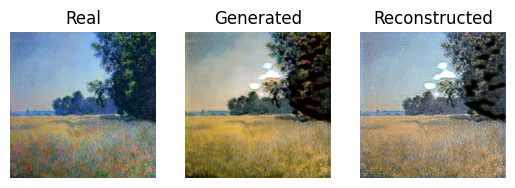

1/1 [==============================] - 0s 43ms/step


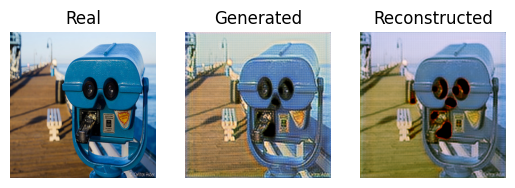

In [63]:
A_real = select_sample(A_data, 1)
B_generated  = monet_to_photo.predict(A_real)
A_reconstructed = photo_to_monet.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)
# plot B->A->B (Photo to Monet to Photo)
B_real = select_sample(B_data, 1)
A_generated  = photo_to_monet.predict(B_real)
B_reconstructed = monet_to_photo.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)


In [64]:
from PIL import Image

In [81]:
test_image = Image.open(path + 'random4.jpg')
print("Original Size: ", test_image.size)
test_image = test_image.resize((256, 256))
print("Resized Image: ", test_image.size)

Original Size:  (4640, 3472)
Resized Image:  (256, 256)


In [82]:
import numpy as np
test_image = img_to_array(test_image)
test_img_input = np.array([test_image])
test_img_input = (test_img_input - 127.5) / 127.5

1/1 [==============================] - 0s 35ms/step


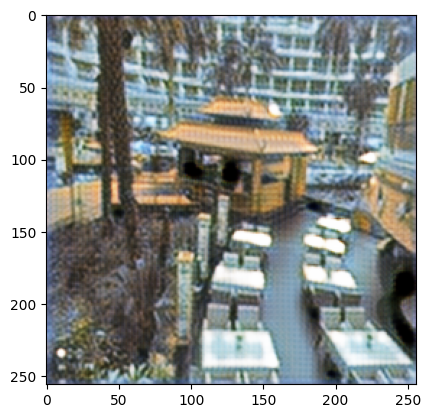

In [83]:
monet_generated = photo_to_monet.predict(test_img_input)
monet_generated = monet_generated * 127.5 + 127.5
pyplot.imshow(monet_generated[0].astype('uint8'))
pyplot.show()

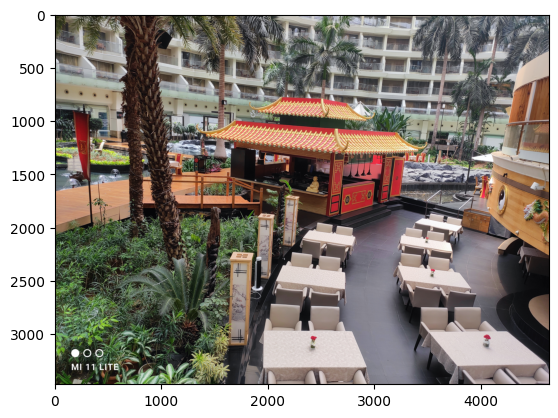

In [84]:
real_image = Image.open(path + 'random4.jpg')
pyplot.imshow(real_image)
pyplot.show()